In [1]:
import numpy as np

In [33]:
np.random.seed(42)
x = 6 * np.random.rand(100,1) - 3
x[0]

array([-0.75275929])

In [34]:
y = 3 * x**2 - 0.5 * x - 8 + 5*np.random.rand(100,1)

In [35]:
import matplotlib.pyplot as plt

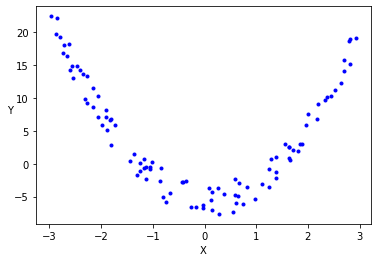

In [36]:
plt.plot(x,y, 'b.')
plt.xlabel('X')
plt.ylabel('Y', rotation = 0)
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly_2 = PolynomialFeatures(degree = 2, include_bias=False)
x_new = poly_2.fit_transform(x)
x_new[0]

array([-0.75275929,  0.56664654])

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lin_reg = LinearRegression()

In [42]:
lin_reg.fit(x_new, y)

LinearRegression()

In [43]:
lin_reg.coef_,lin_reg.intercept_

(array([[-0.52820451,  2.99836065]]), array([-5.5106644]))

In [48]:
x_test = np.linspace(-3,3,200).reshape(-1,1)
x_test_poly = poly_2.fit_transform(x_test)

In [49]:
y_pred = lin_reg.predict(x_test_poly)

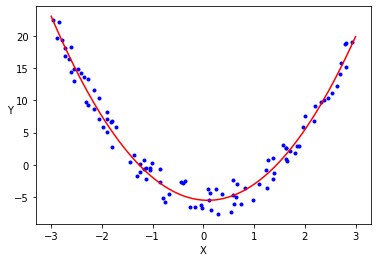

In [50]:
plt.plot(x,y, 'b.')
plt.plot(x_test, y_pred, 'r-')
plt.xlabel('X')
plt.ylabel('Y', rotation = 0)
plt.show()

In [64]:
poly_10 = PolynomialFeatures(degree = 30, include_bias=False)
x_10 = poly_10.fit_transform(x)
x_10[0]

array([-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,  3.21088306e-01,
       -2.41702204e-01,  1.81943579e-01, -1.36959719e-01,  1.03097700e-01,
       -7.76077513e-02,  5.84199555e-02, -4.39761640e-02,  3.31034659e-02,
       -2.49189414e-02,  1.87579645e-02, -1.41202320e-02,  1.06291358e-02,
       -8.00118067e-03,  6.02296306e-03, -4.53384137e-03,  3.41289120e-03,
       -2.56908555e-03,  1.93390300e-03, -1.45576345e-03,  1.09583945e-03,
       -8.24903326e-04,  6.20953639e-04, -4.67428619e-04,  3.51861234e-04,
       -2.64866811e-04,  1.99380952e-04])

In [65]:
lin_reg_10 = LinearRegression()
lin_reg_10.fit(x_10,y)
lin_reg_10.intercept_, lin_reg_10.coef_

(array([-6.9439931]),
 array([[-9.48095733e-01,  1.13615475e+01,  5.22204056e+00,
         -5.71153353e+00, -1.12533529e+01, -4.68006411e+00,
         -4.46911408e-01,  1.43666628e+00,  1.02341629e+01,
          3.80581045e+00,  1.06875397e-01, -3.86025086e-01,
         -1.02377990e+01, -3.05999303e+00,  8.81737573e+00,
          2.53611682e+00, -3.79824004e+00, -1.01730103e+00,
          1.00000422e+00,  2.47464083e-01, -1.70824713e-01,
         -3.89212061e-02,  1.90837748e-02,  3.99161265e-03,
         -1.34907910e-03, -2.58126313e-04,  5.48604486e-05,
          9.55742327e-06, -9.78864888e-07, -1.54318026e-07]]))

In [66]:
x_test_10 = poly_10.fit_transform(x_test)
y_pred_10 = lin_reg_10.predict(x_test_10)

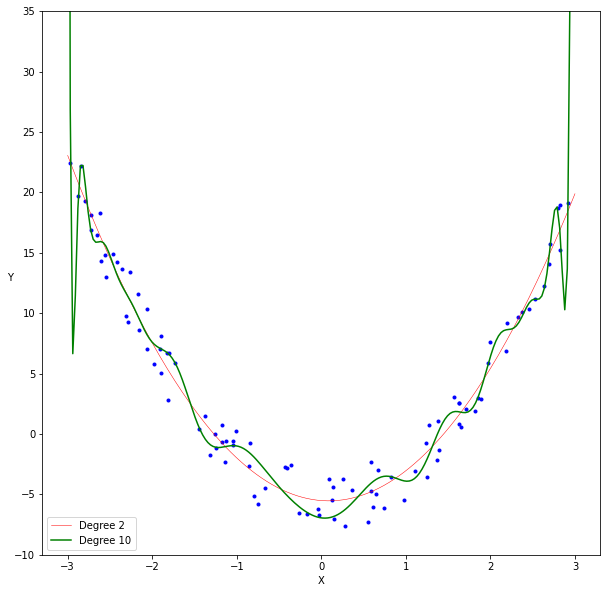

In [67]:
plt.figure(figsize = (10,10))
plt.plot(x,y, 'b.')
plt.plot(x_test, y_pred, 'r-', label = 'Degree 2', lw = 0.5)
plt.plot(x_test,y_pred_10, 'g-', label = 'Degree 10')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y', rotation = 0)
plt.ylim(-10,35)
plt.show()

In [84]:
from sklearn.linear_model import Ridge,Lasso

In [86]:
ridge = Ridge(alpha = 1, solver = 'cholesky', random_state=42)
lasso = Lasso(alpha = 1, random_state=42,)

In [87]:
ridge.fit(x_new,y)
lasso.fit(x_new,y)

Lasso(alpha=1, random_state=42)

In [79]:
ridge.coef_,ridge.intercept_

(array([[-0.52719139,  2.99423337]]), array([-5.49733299]))

In [88]:
lasso.coef_,lasso.intercept_

(array([-0.23017434,  2.8791577 ]), array([-5.07754381]))

In [80]:
y_pred_ridge = ridge.predict(x_test_poly)

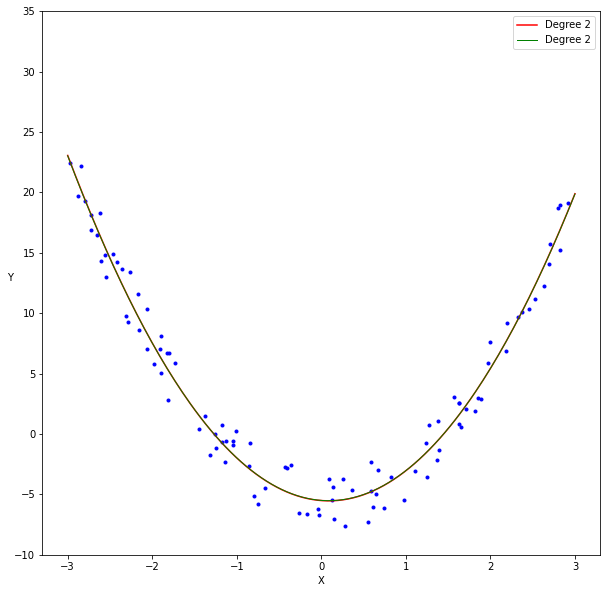

In [82]:
plt.figure(figsize = (10,10))
plt.plot(x,y, 'b.')
plt.plot(x_test, y_pred, 'r-', label = 'Degree 2', lw = 1.5)
# plt.plot(x_test,y_pred_10, 'g-', label = 'Degree 10')
plt.plot(x_test, y_pred_ridge, 'g-', label = 'Degree 2', lw = 1)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y', rotation = 0)
plt.ylim(-10,35)
plt.show()